# Quickstart

This notebook is just to make sure that everything works.

In [3]:
#Let's pull latest repo version from github
!git pull

Already up to date.


In [5]:
#General imports and setup

import os
import tiktoken
import openai
from dotenv import load_dotenv

# Load environment variables
load_dotenv('../.env', override=True)

# Option 2 - Using Access Key
openai.api_type = "azure"
openai.api_base = os.environ.get("OPENAI_API_BASE")
openai.api_key = os.environ.get("OPENAI_API_KEY")
openai.api_version = os.environ.get('OPENAI_API_VERSION', "2022-12-01")

# Define embedding model and encoding
EMBEDDING_MODEL = os.environ.get('OPENAI_EMBEDDING_MODE', 'text-embedding-ada-002')
COMPLETION_MODEL = os.environ.get('OPENAI_COMPLETION_MODEL', 'gpt-35-turbo')

print("Will use the following env data:")
for key, value in os.environ.items():
    if key.startswith("OPENAI") and key != 'OPENAI_API_KEY':
        print(f"{key}={value}")

Will use the following env data:
OPENAI_API_BASE=https://handsonoctober.openai.azure.com/
OPENAI_API_REGION=eastus


Test if tokenizer works:

In [6]:
text_to_encode = "Hello world!"
tokenizer = tiktoken.get_encoding('cl100k_base')
tokens = tokenizer.encode(text_to_encode)
print(f"There are {len(tokens)} for text prompt: '{text_to_encode}'")
for toekn in tokens:
    print(f"{toekn} - {tokenizer.decode([toekn])}")

There are 3 for text prompt: 'Hello world!'
9906 - Hello
1917 -  world
0 - !


Test if completitions work:

In [8]:
response = openai.Completion.create(engine="gpt-35-turbo",
                                    prompt="Knock knock.",
                                    temperature=0.9)
print(response.choices[0].text)

 Who’s there? Batman. Batman who? Batman up a cake for your birthday


Do it in a streaming fashion:

In [9]:
import sys
for resp in openai.Completion.create(engine='gpt-35-turbo', prompt='Give me 5 taglines for an ice cream shop', max_tokens=512, stream=True):
    sys.stdout.write(resp.choices[0].text)
    sys.stdout.flush()



Woman in the era before Feminism

Do you enjoy dresses and skirts?

What is the ideal body type that women prefer?

Pinterest can be awesome if you use it right. Is it a useful tool or a humble brag fest? What do you think?

What is your opinion on make-up?

What do you think of women that keep their hair natural, without dying it or keeping up with current trends? Do men find it boring?

How much make up is too much? Where do you draw the line?

Would you ever date a guy who was shorter than you?

Rights belong to their respective owners. This blog is for informational purposes only. Let me know if you want me to remove something, I will do it immediately. by garrysblog.com / gmail.com / ask@garrys.blog

Test if Local embedding model work:

Got embeddings from local embeder with shape (1, 384)


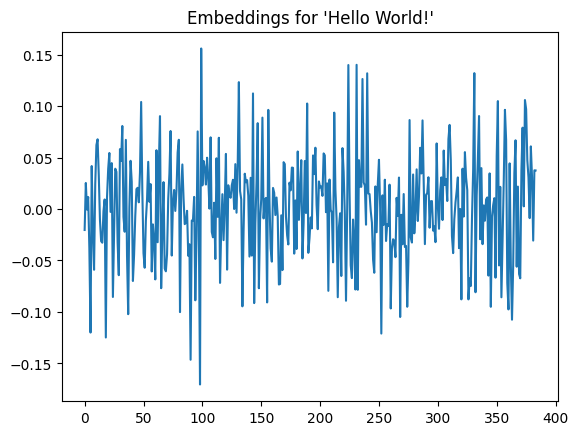

In [12]:
from sentence_transformers import SentenceTransformer
from matplotlib import pyplot as plt

sentences = ['Hello World!']
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(f"Got embeddings from local embeder with shape {embeddings.shape}")

plt.plot(embeddings[0]);
plt.title("Embeddings for 'Hello World!'");

Test if OpenAI (remote) embeddings work:

Got embeddings from openai embeder with shape 1536
Full response keys from embedding dict_keys(['object', 'data', 'model', 'usage'])
Embedding [-0.00709586450830102, 0.00353202223777771, -0.006981312297284603, -0.029096225276589394, -0.013014388270676136, 0.01081880647689104, -0.020224804058670998, 0.005049837287515402, -0.00842594075948, -0.030267203226685524] ...


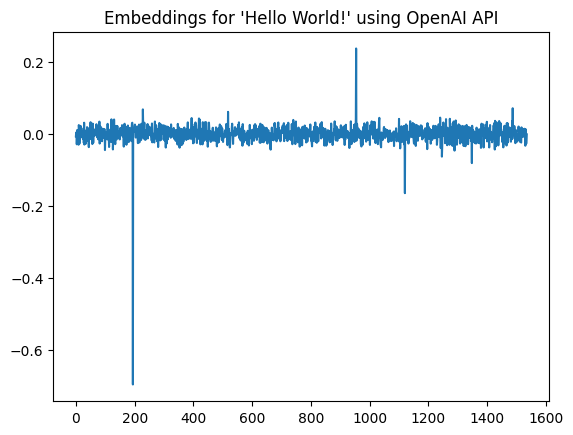

In [15]:
#Use it only once and then the local embeddings.
response = openai.Embedding.create(input="Hello World", engine=EMBEDDING_MODEL)
embeddings = response["data"][0]["embedding"]
print(f"Got embeddings from openai embeder with shape {len(embeddings)}")

print("Full response keys from embedding", response.keys())

print("Embedding", embeddings[:10], "...") # Print only first 10 values

plt.plot(embeddings);
plt.title("Embeddings for 'Hello World!' using OpenAI API");